# NPZD slab model

For the first model example I will need:
- Forcing input
- Forcing_fluxes:
    - mixing
    - sinking
- 4 components (single) N, P, Z, D
- Fluxes:
TODO: GO OVER THE equations! Base model structure in math!
    - Grazing - linked to all NPZD
    - PhytoplanktonGrowth
        - Light - Dependence
        - Nutrients - Dependence
        - Temp - Dependence
    - mortality
    - remineralisation
    - higher order pred, etc

In [1]:
import numpy as np
import xsimlab as xs

In [2]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra
from phydra.processes.main import Grid0D,Boundary0D

from phydra.processes.fluxes import Flux, LimitedGrowth, NutrientDependency


from phydra.processes.components import make_Component, Component, AllComponents, Time
from phydra.processes.gekkocontext import GekkoContext, GekkoSolve

from phydra.utility.xsimlabwrappers import phydra_setup, createSingleComp, createMultiComp, specifyComps4Flux

In [3]:
from phydra.processes.forcing import Forcing

In [4]:
print('xarray-simlab version: ', xs.__version__)
print('phydra version: ', phydra.__version__)

xarray-simlab version:  0.4.1
phydra version:  0+untagged.64.g69bceb0.dirty


In [5]:
model = xs.Model({'time':Time, 'grid':Grid0D, 'ibcs':Boundary0D, 'context':GekkoContext, 
                  'N':make_Component('Nutrient','Z'), 'P':make_Component('Phytoplankton','Z'),
                  'Z':make_Component('Zooplankton','Z'), 'D':make_Component('Detritus','Z'),
                  'AllComps':AllComponents, 'P_Growth':LimitedGrowth, 'P_Growth_Ndep':NutrientDependency, 
                  'solver':GekkoSolve})

model

<xsimlab.Model (12 processes, 19 inputs)>
context
time
    days        [in] ('time',) time in days
grid
    length      [in]
    shape       [in]
ibcs
    ibc         [in] Initial Boundary Conditions
N
    label       [in]
    init        [in]
    dim         [in]
P
    label       [in]
    init        [in]
    dim         [in]
Z
    init        [in]
    dim         [in]
    label       [in]
D
    dim         [in]
    label       [in]
    init        [in]
AllComps
P_Growth
    C_label     [in]
    mu          [in] Maximum growth rate of component
P_Growth_Ndep
    halfsat     [in]
solver

In [6]:
model.index_vars 

[('time', 'time'),
 ('N', 'index'),
 ('P', 'index'),
 ('Z', 'index'),
 ('D', 'index'),
 ('AllComps', 'components')]

In [7]:
in_ds = phydra_setup(
    model=model,
    input_vars={
        'time__days': ('time', np.arange(0, 150)),
        
        'N':{'dim':1,'label':'N','init':1}, 
        'P':{'dim':1,'label':'P','init':1},
        'Z':{'dim':1,'label':'Z','init':1},
        'D':{'dim':1,'label':'D','init':1},
        
        'P_Growth':{'mu':0.1,
               'C_label':'P'},
        'P_Growth_Ndep':{
               'halfsat':0.5}
    },
    output_vars={
        'AllComps__outputs':None
    }
                 )

In [8]:
with model:
    out_ds = in_ds.xsimlab.run()

Initializing Gekko Context
Initializing Model Time
Initializing component  N
['N']
[[0.]]
Initializing component  P
['P']
[[0.]]
Initializing component  Z
['Z']
[[0.]]
Initializing component  D
['D']
[[0.]]
LimitedGrowth flux is initialized for P
Initialize NutrientDependency
Assembling equation for component  N
Assembling equation for component  P
Assembling equation for component  Z
Assembling equation for component  D
Initializing GrowthDependencies: Gekko math dict stores: dict_items([('P', 0)])
i1
SolveInit
Model context dict stores: dict_items([('shape', {'env': 1}), ('comp_dims', {'N': 1, 'P': 1, 'Z': 1, 'D': 1})])
ModelSolve done


KeyError: ('AllComps', 'outputs')

In [9]:
out_ds

<xarray.Dataset>
Dimensions:                 (Z: 1, clock: 2, components: 4, time: 150)
Coordinates:
  * clock                   (clock) int64 0 1
  * components              (components) <U1 'N' 'P' 'Z' 'D'
  * time                    (time) int64 0 1 2 3 4 5 ... 144 145 146 147 148 149
Dimensions without coordinates: Z
Data variables:
    AllComps__outputs       (components, time) float64 1.0 1.0 1.0 ... 1.0 1.0
    D__dim                  int64 1
    D__init                 int64 1
    D__label                <U1 'D'
    N__dim                  int64 1
    N__init                 int64 1
    N__label                <U1 'N'
    P_Growth_Ndep__halfsat  float64 0.5
    P_Growth__C_label       <U1 'P'
    P_Growth__mu            float64 0.1
    P__dim                  int64 1
    P__init                 int64 1
    P__label                <U1 'P'
    Z__dim                  int64 1
    Z__init                 int64 1
    Z__label                <U1 'Z'
    grid__length            int64 1
    grid__shape             int64 1
    ibcs__ibc               float64 nan
    index                   (Z) <U1 'D'
    time__days              (time) int64 0 1 2 3 4 5 ... 144 145 146 147 148 149

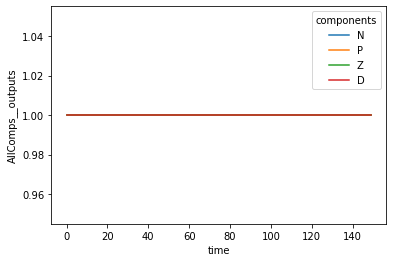

In [10]:
out_ds.AllComps__outputs.set_index(time='time',).plot.line(x='time')